# Animations with matplotlib

This is an example of creating an animation gif file showing an evolving plate reconstruction generated from pygplates and in a way that is primarily pythonic - the plotting is taken care of by matplotlib (including the Basemap extension). The frames are directly combined into a gif file. 

[This method seems to be quite slow to run. The use of 'with.xkcd()' is optional]


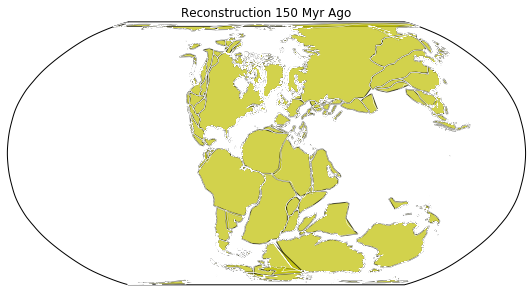

In [1]:
import pygplates
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib import animation

%matplotlib inline

# Names of input files
input_feature_filename = '../Data/Seton_etal_ESR2012_Coastlines_2012.1_Polygon.gpmlz'
input_rotation_filename = '../Data/Seton_etal_ESR2012_2012.1.rot'

# Name of ouput file
output_reconstructed_feature_filename = 'tmp.shp'

with plt.xkcd():
    fig = plt.figure(figsize=(8,5))
    ax_map = fig.add_axes([0,0,0.9,1.0])
    m = Basemap(projection='robin', lon_0=0, resolution='c', ax=ax_map)
    m.drawmapboundary(fill_color='white')

    Nframes = 31

    def animate(nframe):
        ax_map.cla()
        reconstruction_time = 150-(nframe*5)
        pygplates.reconstruct(input_feature_filename, input_rotation_filename, output_reconstructed_feature_filename, reconstruction_time, anchor_plate_id=0)

        shp_info = m.readshapefile('tmp','shp',drawbounds=True,color='w')

        for nshape,seg in enumerate(m.shp):
            poly = Polygon(seg[::5],facecolor='y',edgecolor='k',alpha=0.7)
            ax_map.add_patch(poly)
        plt.title('Reconstruction %s Myr Ago' % reconstruction_time)

    anim = animation.FuncAnimation(fig, animate,
                                   frames=Nframes, interval=250)

    anim.save('PlateReconstruction.gif', writer='imagemagick')



In [2]:
from IPython.display import Image
Image(url='./PlateReconstruction.gif')